In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snr

In [126]:
data=pd.read_csv("Standard Metropolitan Areas Dataset (1).csv")

In [127]:
data.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [128]:
data.isna().sum() #preprocessing:-no null values and no categorical values

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land_area       99 non-null     int64  
 1   percent_city    99 non-null     float64
 2   percent_senior  99 non-null     float64
 3   physicians      99 non-null     int64  
 4   hospital_beds   99 non-null     int64  
 5   graduates       99 non-null     float64
 6   work_force      99 non-null     float64
 7   income          99 non-null     int64  
 8   region          99 non-null     int64  
 9   crime_rate      99 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


<Axes: >

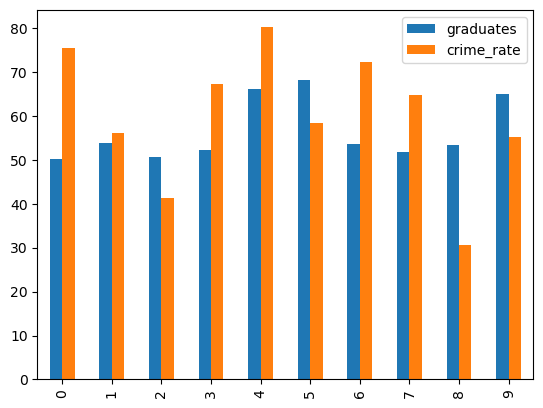

In [130]:
df=data[['graduates','crime_rate']]
df.iloc[0:10,:].plot(kind='bar') #visualising the first 10 rows from the data in form of a bar graph

<Axes: >

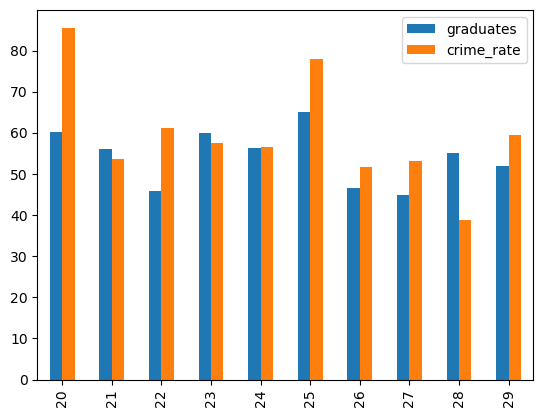

In [131]:
df.iloc[20:30,:].plot(kind='bar')

<Axes: >

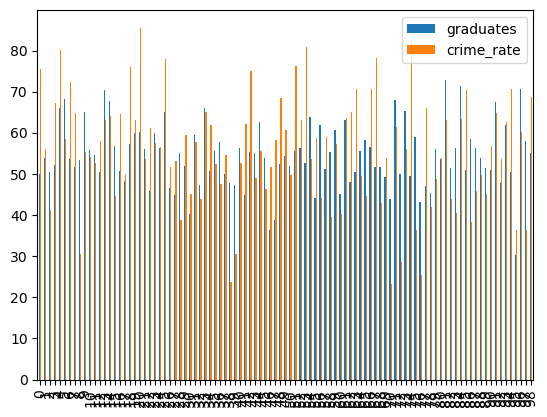

In [132]:
df.iloc[:,].plot(kind='bar')

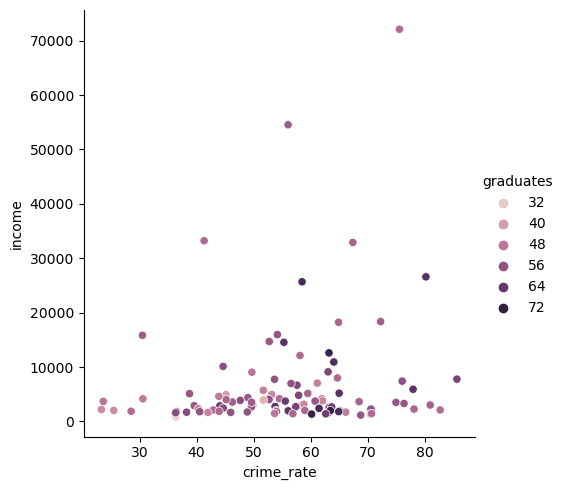

In [133]:
snr.relplot(x='crime_rate',y='income',data=data,hue='graduates')

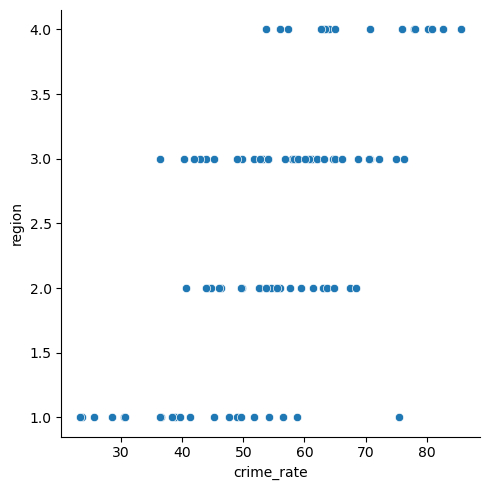

In [134]:
snr.relplot(x='crime_rate',y='region',data=data)

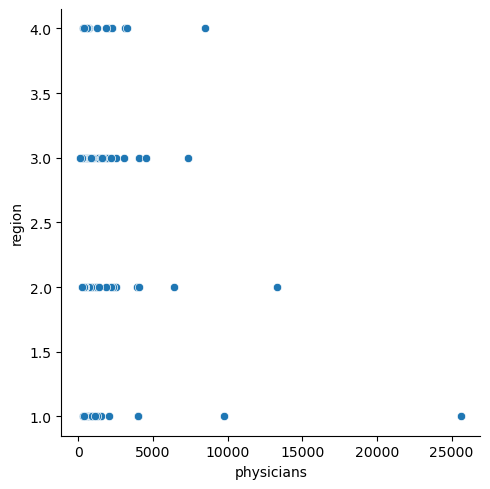

In [135]:
snr.relplot(x='physicians',y='region',data=data)

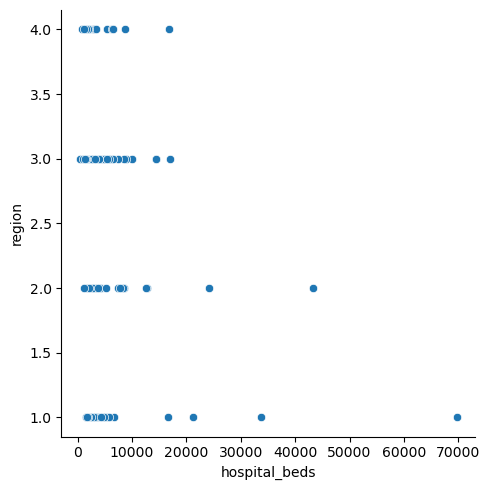

In [136]:
snr.relplot(x='hospital_beds',y='region',data=data)

In [137]:
#dividing data into dependent and independent variables
x=data.drop(['crime_rate'],axis=1) #independent variable
y=data['crime_rate'] #dependent variable

In [138]:
x.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4


In [162]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8) #85% data used for training rest for test

In [163]:
#creating a supervised model using Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [164]:
#training the model
model.fit(x_train,y_train) #fit allows the model to learn

LinearRegression()

In [165]:
#predictions using the model
y_hat=model.predict(x_test) #predict() will help in making mlm predictions

In [166]:
#accuracy of the model
from sklearn.metrics import r2_score# r2score is a matrix to calculate the accuracy of the regression model
score=r2_score(y_test,y_hat)

In [167]:
print(score) #error component

0.20658900077021647


In [168]:
model.score(x,y) #accuracy of the model

0.4871556205016325